<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%C2%ABData_Scientist%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/DIP-DSR-CP

## Описание задания

Поздравляем! Вы попали на стажировку в одно из подразделений группы компаний, Вы — аналитик крупного агрегатора такси. Теперь перед вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке. Успехов!

### Загрузите файл dip_hw_x_taxi.csv в pandas dataframe



In [ ]:
import pandas as pd

df = pd.read_csv('https://u.netology.ru/backend/uploads/lms/attachments/files/data/51885/dip_hw_x_taxi.csv')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


### Рассчитайте основные описательные статистики
(среднее, минимум, 25-50-75-персентили, максимум)


In [ ]:
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


### Вычислите количество значений по классам такси



In [ ]:
df['offer_class_group'].value_counts()

Premium     500
Delivery    500
Comfort     500
Economy     500
Name: offer_class_group, dtype: int64

### Визуализируйте распределение дистанций поездок



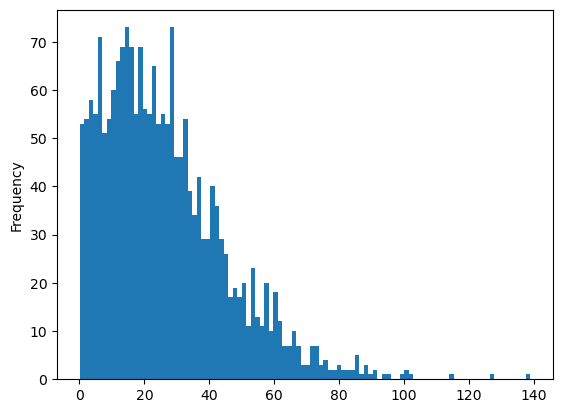

In [ ]:
df['distance_km'].plot(kind='hist', bins=100);

### Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса



In [ ]:
import matplotlib.pyplot as plt

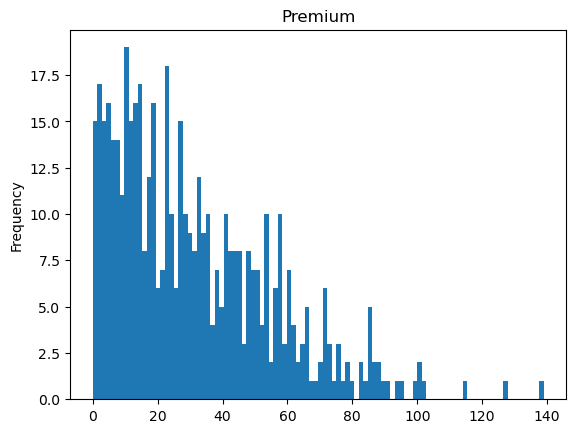

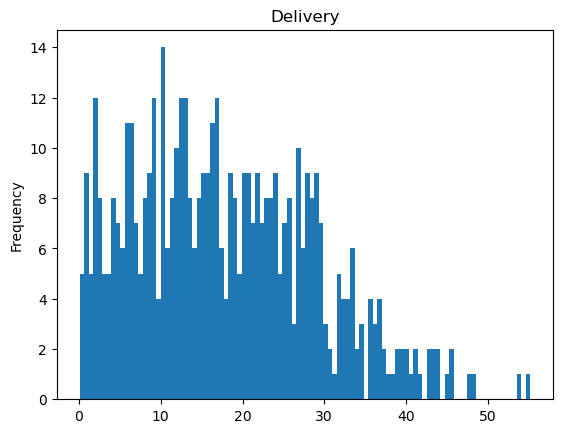

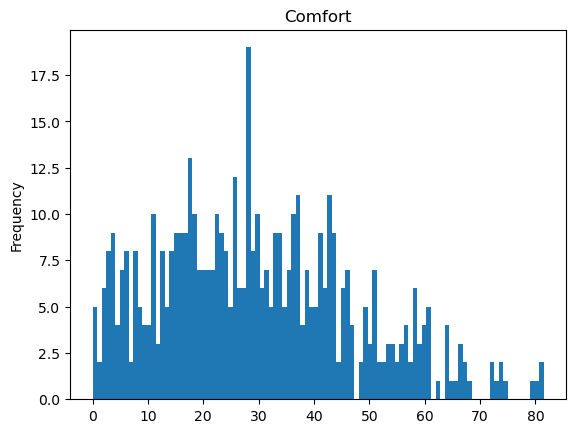

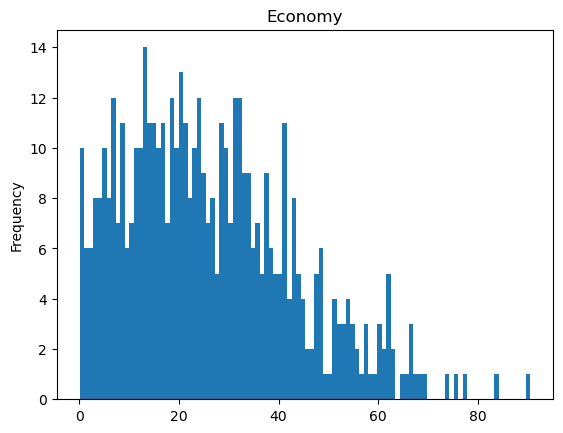

In [ ]:
for x in df['offer_class_group'].unique():
    plt.figure()
    df[df['offer_class_group'] == x]['distance_km'].plot(kind='hist', bins=100)
    plt.title(x)

### Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов (примечание: поможет функция sns.distplot)



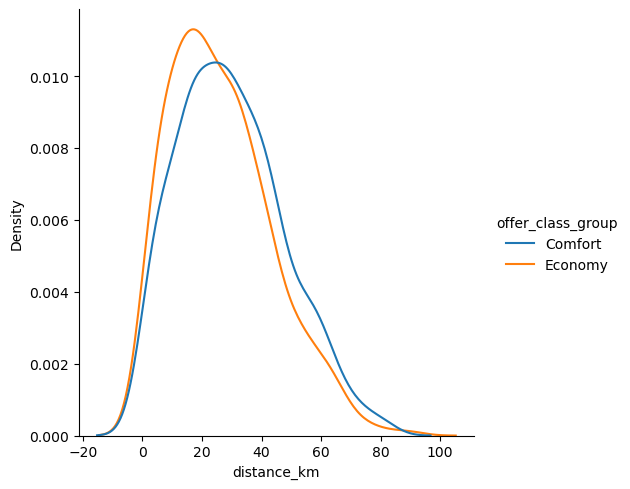

In [ ]:
import seaborn as sns
sns.displot(data=df[df.offer_class_group.isin(['Economy', 'Comfort'])],
            x='distance_km',
            hue='offer_class_group',
            kind='kde');

### Проведите стат. тест (поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)



In [ ]:
from scipy.stats import ttest_ind

econ = df[df['offer_class_group'] == 'Economy']
comf = df[df['offer_class_group'] == 'Comfort']

In [ ]:
t, p_value = ttest_ind(econ['distance_km'], comf['distance_km'])
t, p_value

(-3.1706426042389815, 0.0015673809987275479)

### Сделайте выводы по результатам проведения стат. теста



pvalue = 0.001, что меньше уровня значимости 0.05, это говорит о том, что нулевую гипотезу можем отклонить, то есть среднее двух распределений различны и это статистически значимо.

### Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)



In [ ]:
econ['distance_km'].mean()

26.283097999999978

In [ ]:
comf['distance_km'].mean()

29.758915999999985

## Дополнительное задание*

Вы справились с исследованием данных! Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. Вам доверена срочная задача. Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий.

### Загрузите файл dip_hw_covid.csv в pandas dataframe



In [ ]:
df = pd.read_csv('https://u.netology.ru/backend/uploads/lms/attachments/files/data/51888/dip_hw_covid.csv')
df.head()

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0


### Исследуйте данные:

- Рассчитайте коэффициент корреляции между заболеваемостью и смертностью




In [ ]:
df.corr()

,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


- Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения

In [ ]:
df['country'].value_counts()

Russia    558
US        558
Name: country, dtype: int64

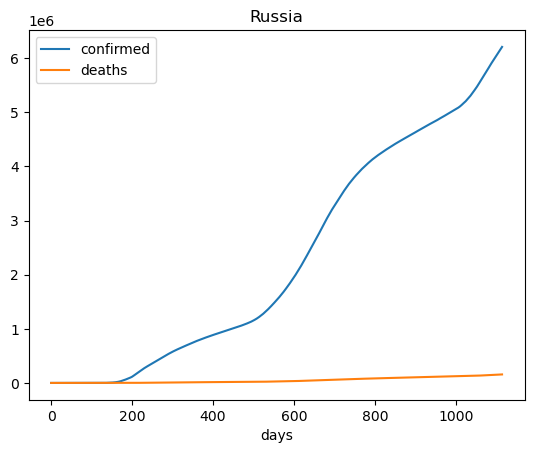

In [ ]:
rus = df[df['country'] == 'Russia']
plt.plot(rus['confirmed'], label='confirmed')
plt.plot(rus['deaths'], label='deaths')
plt.legend()
plt.title('Russia')
plt.xlabel('days');

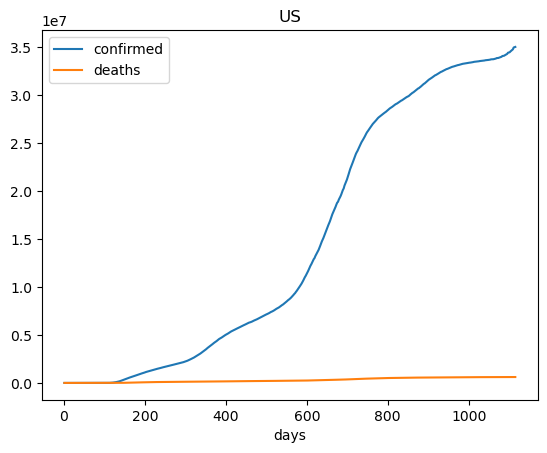

In [ ]:
us = df[df['country'] == 'US']
plt.plot(us['confirmed'], label='confirmed')
plt.plot(us['deaths'], label='deaths')
plt.legend()
plt.title('US')
plt.xlabel('days');

### Постройте модель линейной регрессии по смертям от заболеваемости
и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений

примечание:
- сформируйте выборку по России
- выделите признак и целевую переменную [используем 100% данных для обучения]
- постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict]
- сделайте выводы по полученному прогнозу



In [ ]:
X = rus[['confirmed']]
y = rus['deaths']

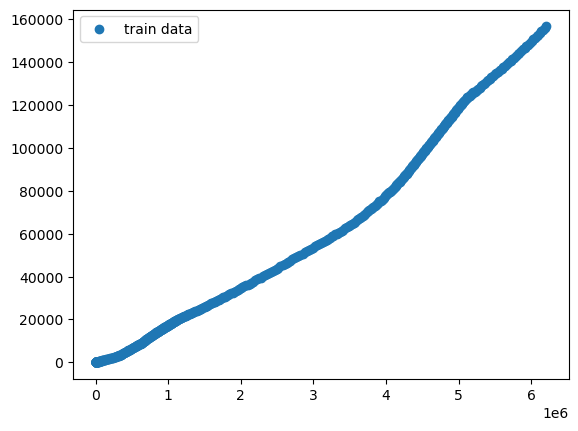

In [ ]:
plt.scatter(X, y, label='train data')
plt.legend();

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
import numpy as np

test_X = np.array([[25_000_000]])
pred = lr.predict(test_X)
pred

D:\Users\Magnus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([582420.3846451])

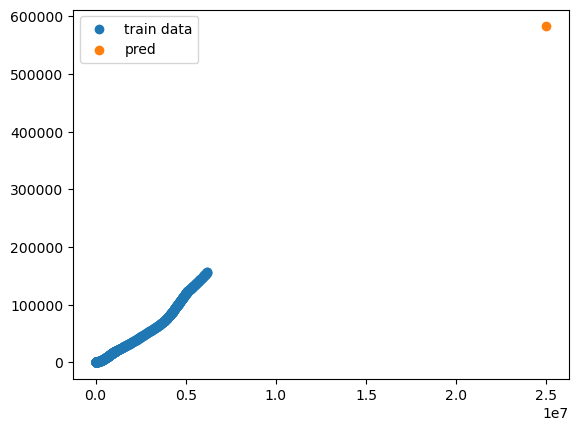

In [ ]:
plt.scatter(X, y, label='train data')
plt.scatter(test_X, pred, label='pred')
plt.legend();

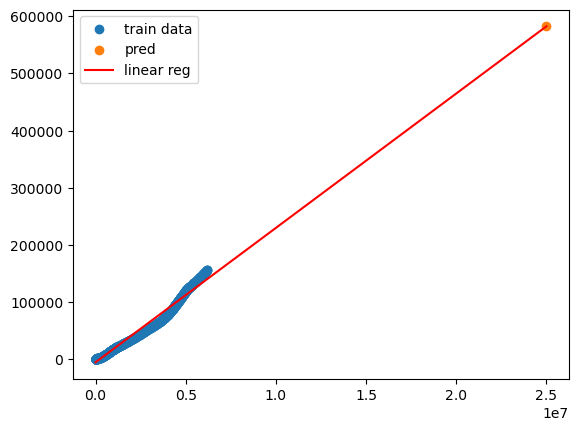

In [ ]:
a = lr.coef_[0]
b = lr.intercept_

line_x = np.linspace(0, 25_000_000)
line_y = a * line_x + b

plt.scatter(X, y, label='train data');
plt.scatter(test_X, pred, label='pred')
plt.plot(line_x, line_y, c='r', label='linear reg')
plt.legend();

## Дополнительное задание**:

Вы исследовали данные компании! Но у инфраструктурного отдела произошли неполадки, возникло подозрение о сбое работы логики записи состоявшихся поездок. Вам доверена задача проверить наличие ошибок в имеющихся данных, чтобы удостовериться в корректности сделанных выводов и помочь коллегам.


### Загрузите файл dip_db_check_taxi.csv (содержит случайный семпл данных заказанных поездок) в pandas dataframe

проверьте предположение компании о нарушении работы базы данных (фантомном задвоении фиксации заказов такси)
- для этого постройте коллаборативную фильтрацию по идентификаторам поездок для определения наиболее похожих/идентичных записей
- после, удалите дубликаты получившихся пар и сделайте выводы о наличии задвоений и корректности работы базы.



In [ ]:
df = pd.read_csv('https://u.netology.ru/backend/uploads/lms/attachments/files/data/52036/dip_db_check_taxi.csv')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,4957,3,27,14.239,1
1,9314,3,21,39.518,2
2,13922,2,21,17.203,2
3,37826,5,19,36.971,2
4,38936,2,19,49.634,2


In [ ]:
df.shape

(100, 5)

In [ ]:
df['order_gk'].value_counts()

4957      1
549348    1
635251    1
626856    1
620982    1
         ..
204791    1
200303    1
197454    1
194882    1
867363    1
Name: order_gk, Length: 100, dtype: int64

**Все идентификаторы разные, значит ничего из них не получим, поэтому занесем в индекс.**

In [ ]:
df = df.set_index('order_gk')
df.head()

,weekday_key,hour_key,distance_km,offer_class_group
order_gk,,,,
4957,3,27,14.239,1
9314,3,21,39.518,2
13922,2,21,17.203,2
37826,5,19,36.971,2
38936,2,19,49.634,2


**Возьмём 5 бижайших соседей и обучим на эвклидовом расстоянии.**

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5, metric='euclidean')
neigh.fit(df)

NearestNeighbors(metric='euclidean')

**Найдём самые ближние объекты**

In [ ]:
result = pd.DataFrame(columns=['target', 'closest_dist', 'closest_idx'])

for idx in df.index:
    res = neigh.kneighbors(df.loc[[idx]], return_distance=True)

    result = pd.concat(
        [result,
         pd.DataFrame({
              'target': [idx],
              'closest_dist': [res[0][0][1]],
              'closest_idx': [df.iloc[res[1][0][1]].name]
          })
         ]
      )

In [ ]:
result.sort_values('closest_dist')[:10]

,target,closest_dist,closest_idx
0,94794,0.033000,330292
0,330292,0.033000,94794
0,412671,1.092923,597863
0,597863,1.092923,412671
0,293849,1.441472,190596
0,190596,1.441472,293849
0,699904,1.448000,86889
0,86889,1.448000,699904
0,558065,1.460307,516190
0,516190,1.460307,558065


**После сортировки получам пары объектов идущие подряд, рассмотрим их.**

In [ ]:
print(f'{df.loc[94794]}\n\n{df.loc[330292]}')

weekday_key           2.000
hour_key             20.000
distance_km          57.879
offer_class_group     3.000
Name: 94794, dtype: float64

weekday_key           2.000
hour_key             20.000
distance_km          57.846
offer_class_group     3.000
Name: 330292, dtype: float64


**Эти два объекта очень похожи, скорее всего дубли, поэтому один удалим.**

In [ ]:
print(f'{df.loc[412671]}\n\n{df.loc[597863]}')

weekday_key           3.000
hour_key             21.000
distance_km          22.122
offer_class_group     3.000
Name: 412671, dtype: float64

weekday_key           3.000
hour_key             20.000
distance_km          22.563
offer_class_group     3.000
Name: 597863, dtype: float64


**Это скорее всего объекты разные, разница в час. Приехал в одну сторону попросил подожать часок, дал на чай и вернулся обратно.**

In [ ]:
print(f'{df.loc[293849]}\n\n{df.loc[190596]}')

weekday_key           6.000
hour_key             23.000
distance_km          11.627
offer_class_group     1.000
Name: 293849, dtype: float64

weekday_key           6.000
hour_key             22.000
distance_km          11.348
offer_class_group     2.000
Name: 190596, dtype: float64


**Похоже, но машины разные, скорее всего была замена на автомобиль другого класса.**

In [ ]:
print(f'{df.loc[699904]}\n\n{df.loc[86889]}')

weekday_key           2.000
hour_key             24.000
distance_km          11.013
offer_class_group     3.000
Name: 699904, dtype: float64

weekday_key           2.000
hour_key             24.000
distance_km           9.565
offer_class_group     3.000
Name: 86889, dtype: float64


**А здесь совпадение уже слишком мало. У остальных объектов расстояние ещё больше.**